In [8]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from PIL import Image
import os

In [9]:
def mnist_Preprocessing():
	#mnist前処理
	(x_train, y_train), (x_test, y_test) = mnist.load_data()
	x_train_1 = converter(x_train, y_train, 1, 784)
	x_test_1 = converter(x_test, y_test, 1, 784)
	x_test_7 = converter(x_test, y_test, 7, 784)
	return x_train_1, x_test_1, x_test_7

In [10]:
def converter(xarray, yarray, num, outputnum):
	#numで指定されたラベルの値の該当するデータを抽出し，成形する
	xarray = xarray[np.where(yarray == num)[0]]
	xarray = xarray.astype('float32') / 255.0
	xarray = np.reshape(xarray, (len(xarray),outputnum))
	return xarray

In [15]:
def execute_OCSVM(x_train_1, x_test_1, x_test_7):
	#One Class SVM を実行
	clf = svm.OneClassSVM(nu = 0.2, kernel="rbf", gamma=0.001)
	clf.fit(x_train_1)
	#配列の頭から「１」を100個，「７」を20個取り出し予想
	test = np.vstack((x_test_1[0:100], x_test_7[0:20]))
	test1 = x_test_7[0:100]
	pred = clf.predict(test)
	return pred

In [16]:
def evaluate(pred):
	#accracyの計算
#	answer = np.array([1] * 100 + [-1] * 20)
	answer = np.array([1] * 100 + [-1] * 20)
	acc =  len(pred[pred == answer])/120.0
	print("accuracy : " + str(acc))
	print([i for i,j in enumerate(pred) if j == -1])

In [17]:
def show_Graph(pred):
	#予想された値をグラフ化し表示・保存
	x = np.arange(0, 120, 1)
	plt.plot(x, pred)
	plt.savefig('SVMmnist.png')
	plt.show()
    

accuracy : 0.9
[8, 12, 13, 24, 26, 49, 69, 73, 74, 75, 84, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


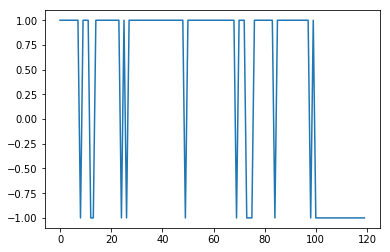

In [18]:
if __name__ == "__main__":
	x_train_1, x_test_1, x_test_7 = mnist_Preprocessing()
	pred = execute_OCSVM(x_train_1, x_test_1, x_test_7)
	evaluate(pred)
	show_Graph(pred)

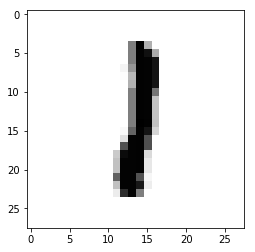

In [10]:
plt.imshow(x_test_1[108].reshape(28,28),cmap='Greys')
plt.show()

In [9]:
x_train_1.shape

(6742, 784)

In [38]:
pil_img = Image.fromarray(test)
pil_img = pil_img.convert("RGB")
pil_img = pil_img.resize((224,224))
pil_img.save(os.path.join("/home/baba/test_VGG16/", 'mnist_test.jpg'))

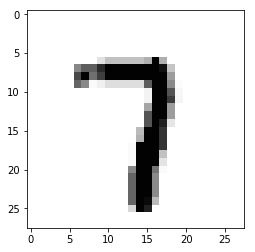

In [28]:
plt.imshow(x_test_7[115].reshape(28,28),cmap='Greys')
plt.show()

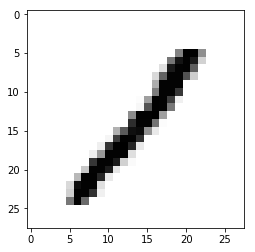

In [53]:
plt.imshow(x_test_1[1012].reshape(28,28),cmap='Greys')
plt.show()

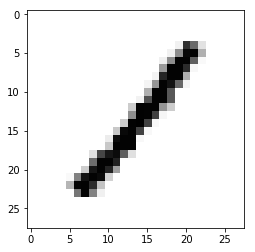

In [54]:
plt.imshow(x_test_1[1016].reshape(28,28),cmap='Greys')
plt.show()

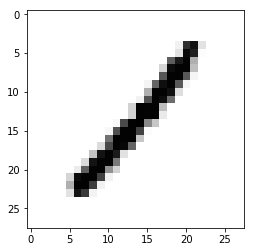

In [55]:
plt.imshow(x_test_1[1017].reshape(28,28),cmap='Greys')
plt.show()